In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi':180})

import sys
sys.path.append("/home/msdos/DESI-QA/desiarc-main/arc")
sys.path.append("/home/msdos/DESI-QA/")
sys.path.append("/home/msdos/DESI-QA/output/figures/")
import find_center as fc
from spotfinder import spotfinder
from xylib import calc_movetables as cm
import reportlib as rl

figPath = '/home/msdos/DESI-QA/output/figures/Backlash test/'

In [160]:
testStart = np.datetime64('2023-07-07 11:20:35')
testFinish = testStart + np.timedelta64(1,"h")

# Setting paths
datapath = "../output/database.csv"
fidpath = "../output/fiddb.csv"
df = rl.importToDf(datapath,fidpath,testStart,testFinish,testType='RS',motor='phi')

Adding session labels for testType=RS
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [161]:
df[['Backlash','angle']]

,Backlash,angle
0,NaN,0.0
1,NaN,10.0
2,-1.452246,10.0
3,-1.482709,10.0
4,-1.466624,10.0
5,-1.706508,45.0
6,-1.611482,45.0
7,-1.629237,45.0
8,-1.608351,45.0
9,-1.577957,90.0


In [ ]:
rl.angle_between((df),)

In [159]:
df[['x_mm','y_mm']]

,x_mm,y_mm
0,70.014790,31.846679
1,70.057767,32.588494
2,70.022250,31.915556
3,70.048085,32.582263
4,70.026125,31.916506
5,69.378696,34.290016
6,70.020164,31.908659
7,69.374987,34.287029
8,70.025897,31.910271
9,67.308904,35.404208


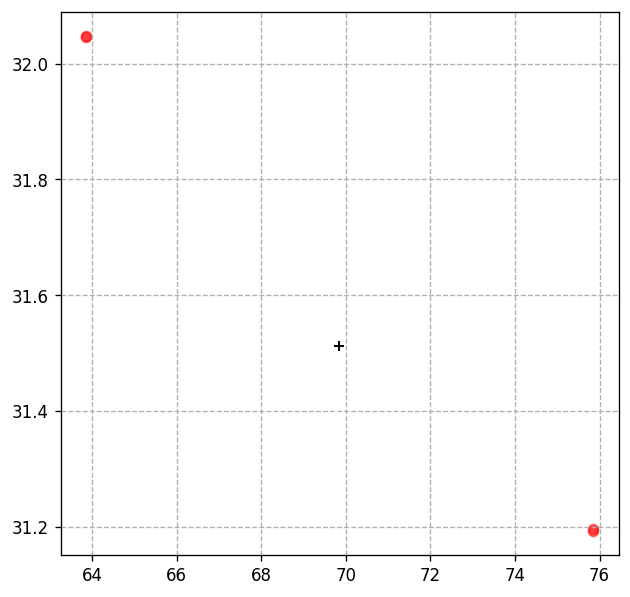

In [94]:
plt.figure(figsize=[6,6])
plt.grid(ls='--')
plt.scatter(df[df['angle']==180]['x_mm'],df[df['angle']==180]['y_mm'],marker='o',c='red',alpha=0.5)
plt.plot(df['xc2mm'],df['yc2mm'],c='black',marker='+')
plt.show()

In [96]:
df[df['angle']==180][['x_mm','y_mm','direction']]

,x_mm,y_mm,direction
9,75.856144,31.196726,cw
10,63.856996,32.045857,ccw
11,75.849662,31.193624,cw
12,63.858514,32.046843,ccw


In [162]:
def costheta(center,point1,point2):
    a = np.array(center) - np.array(point1)
    a = np.dot(a,a)/np.sqrt(np.dot(a,a))
    b = np.array(point2) - np.array(center)
    b = np.dot(b,b)/np.sqrt(np.dot(b,b))
    c = np.array(point2) - np.array(point1)
    c = np.dot(c,c)/np.sqrt(np.dot(c,c))
    return np.degrees(np.arccos((c**2 - a**2 - b**2)/(-2 * a * b)))

In [163]:
RS_Backlash = np.array([np.nan],dtype=float)

ramp = 1.995

for i in range(0,len(df)-1):
    degree = costheta((df.loc[i]['xc2mm'],df.loc[i]['yc2mm']),(df.loc[i]['x_mm'],df.loc[i]['y_mm']),
             (df.loc[i+1]['x_mm'],df.loc[i+1]['y_mm']))
    if df.loc[i+1]['angle']>=180: # axes flip for 180 deg and greater moves
        degree = 360-degree
    if i==0:
        degree-=ramp
    print(degree,df.loc[i+1]['angle'])
    RS_Backlash = np.append(RS_Backlash,degree-df.loc[i+1]['angle'])
    
df["Backlash"] = RS_Backlash

11.920047229230306 10.0
12.619954863796016 10.0
12.517051403474532 10.0
12.488910072653226 10.0
47.32944053086409 45.0
47.49109278835434 45.0
47.491293635424086 45.0
47.445626326079925 45.0
92.57887210287157 90.0
92.50204239168524 90.0
92.27481205051639 90.0
92.29073237414732 90.0
137.34015271022088 135.0
137.34154658951837 135.0
137.2574936553665 135.0
137.3191451857349 135.0
162.27638559461494 160.0
162.27479858224547 160.0
162.0149950533835 160.0
162.10819519716006 160.0


In [164]:
np.nanmedian(df['Backlash'])

2.334796620542484

In [165]:
RS_Backlash

array([       nan, 1.92004723, 2.61995486, 2.5170514 , 2.48891007,
       2.32944053, 2.49109279, 2.49129364, 2.44562633, 2.5788721 ,
       2.50204239, 2.27481205, 2.29073237, 2.34015271, 2.34154659,
       2.25749366, 2.31914519, 2.27638559, 2.27479858, 2.01499505,
       2.1081952 ])

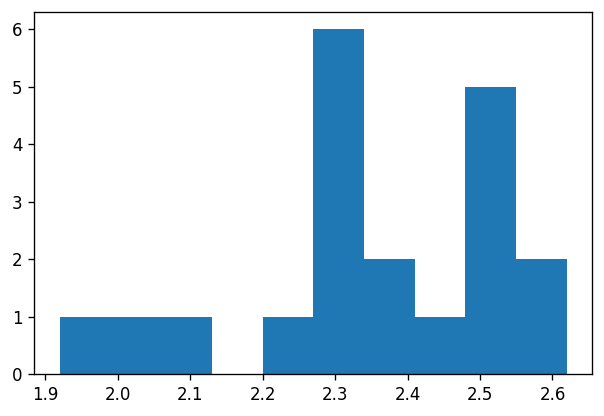

In [166]:
plt.hist(RS_Backlash)
plt.show()

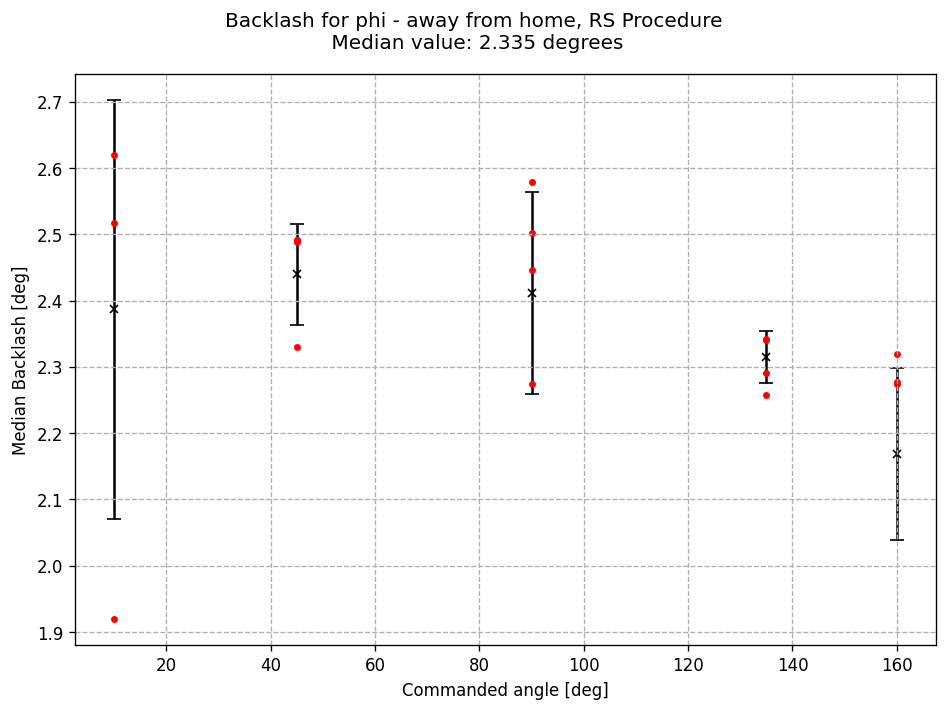

In [168]:
plt.figure(figsize=[8,6])

save = True

title="Backlash for phi - away from home, RS Procedure"

plt.grid(linestyle='--')
plt.suptitle(title+"\n Median value: "+f"{np.nanmedian(df['Backlash']):.3f} degrees")
plt.ylabel("Median Backlash [deg]")
plt.xlabel("Commanded angle [deg]")
for i in range(1,len(df)-1):
    angle = df.loc[i]['angle']
    scatkwargs1 = dict(marker='o',s=10)
#     scatkwargs2 = dict(yerr=np.std(df[msk]['Backlash']),marker='o',markersize=5, elinewidth=0, capsize=4)
#     msk1 = (df['direction']=='ccw') & (df['angle']==angle)
#     msk2 = (df['direction']=='cw') & (df['angle']==angle)
    plt.scatter(angle, RS_Backlash[i-1],**scatkwargs1,color='red')
#     plt.errorbar(angle, np.median(df[msk1]['Backlash']),ecolor='blue',**scatkwargs2,color='blue',alpha=0.5)
#     plt.errorbar(angle, np.median(df[msk2]['Backlash']),ecolor='green',**scatkwargs2,color='green',alpha=0.5)

for angles in np.unique(df['angle'])[1:]:
    plt.errorbar(angles,df[df['angle']==angles]['Backlash'].mean(),
                  yerr=df[df['angle']==angles]['Backlash'].std(),c='black',
                 marker='x',markersize=5, elinewidth=0, capsize=4,zorder=0)
    
# plt.xticks(np.arange(0,361,step=40))
# plt.xlim(0,360)
# plt.ylim(-2.2,-1.7)

plt.tight_layout()

if save:
    plt.savefig(figPath+title+".jpg",dpi=180)

plt.show()

array([ 10.,  90., 180., 270., 340.])